<a href="https://colab.research.google.com/github/jb00753/Data-Analytics-Project1/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
#
Link to my Github repository: https://github.com/jb00753/Data-Analytics-Project1
##
I selected a data set from Kaggle titled: Car_Sales_Info. This data covers car sales, trends, and prices that the cars sold for.

My question to answer during the course of this project is: "What are the most significant factors that influence used cars prices?

 My sub-questions are:
 1. "How does car age and mileage affect vehicle prices and which factor has a stronger impact on the vehicles depriciation".
 2. "Which car manufacturers retain their value the best over time?"
 3. "How does fuel type influence the price of the car?"



#Describe the Data

The data set used in this project was found on Kaggle.
The link to the dataset is: https://www.kaggle.com/datasets/minahilfatima12328/car-sales-info

The dataset has 5000 rows and 7 columns.

The columns are: Manufacturer, Model, Engine Size, Fuel Type, Year of Manufacture, Mileage, Price.

In [23]:
# Part 1

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [24]:
# Part 2: Data Cleaning
#Describe the data
print(df.describe)

print()
print()
#Find missing values
print("Missing values in each column:")
print(df.isnull().sum())

#Find null values
print()
print()
print("Null values in each column:")
print(df.isna().sum())

<bound method NDFrame.describe of       Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0             Ford      Fiesta          1.0    Petrol                 2002   
1          Porsche  718 Cayman          4.0    Petrol                 2016   
2             Ford      Mondeo          1.6    Diesel                 2014   
3           Toyota        RAV4          1.8    Hybrid                 1988   
4               VW        Polo          1.0    Petrol                 2006   
...            ...         ...          ...       ...                  ...   
49995          BMW          M5          5.0    Petrol                 2018   
49996       Toyota       Prius          1.8    Hybrid                 2003   
49997         Ford      Mondeo          1.6    Diesel                 2022   
49998         Ford       Focus          1.0    Diesel                 2016   
49999           VW        Golf          1.4    Diesel                 2012   

       Mileage   Price  
0   

In [25]:
#Continuing the data cleaning process

#Check for duplicates
print("Duplicate rows in the dataset:")
print(df.duplicated().sum())
print()

print(df[df.duplicated()])
print()
print()

#Remove duplicates
df.drop_duplicates(inplace=True)
print("Dataset after removing duplicates:")
print(df)

Duplicate rows in the dataset:
12

      Manufacturer   Model  Engine size Fuel type  Year of manufacture  \
5426            VW    Polo          1.2    Petrol                 2003   
9862          Ford  Mondeo          1.4    Diesel                 1987   
14745          BMW      Z4          2.4    Petrol                 1999   
19020       Toyota   Yaris          1.0    Petrol                 1996   
19337           VW    Polo          1.0    Petrol                 2000   
23927           VW    Polo          1.2    Petrol                 2021   
25368           VW    Golf          1.2    Diesel                 2011   
28576           VW    Polo          1.2    Petrol                 2003   
34246           VW  Passat          2.0    Diesel                 2003   
35647         Ford   Focus          1.6    Petrol                 2019   
41536           VW  Passat          1.8    Diesel                 1996   
45904         Ford  Fiesta          1.2    Petrol                 2003   

  

In [26]:
#Check the data types to ensure they are correct
print("Current data types:")
print(df.dtypes)
print("Detailed info:")
df.info()

Current data types:
Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object
Detailed info:
<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  object 
 1   Model                49988 non-null  object 
 2   Engine size          49988 non-null  float64
 3   Fuel type            49988 non-null  object 
 4   Year of manufacture  49988 non-null  int64  
 5   Mileage              49988 non-null  int64  
 6   Price                49988 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ MB


In [27]:
#Check for unique values in each column

print("Unique values in the categorical columns")
print()
print(df['Manufacturer'].value_counts())
print()
print(df['Model'].value_counts())
print()
print(df['Fuel type'].value_counts())
print()

print("Unique values in the numerical columns")
print()
print(df['Engine size'].value_counts())
print()
print(df['Year of manufacture'].value_counts())
print()
print(df['Mileage'].value_counts())
print()
print(df['Price'].value_counts())

Unique values in the categorical columns

Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64

Model
Mondeo        5057
Golf          5049
Polo          4988
Focus         4975
Fiesta        4924
Passat        4869
RAV4          4292
Prius         4171
Yaris         4090
Z4            1687
M5            1645
X3            1632
911            872
Cayenne        870
718 Cayman     867
Name: count, dtype: int64

Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64

Unique values in the numerical columns

Engine size
1.4    10059
2.0     7630
1.8     7031
1.0     6341
1.6     5508
1.2     4979
2.4     2363
2.2     1678
3.0     1368
4.0     1092
4.4      559
5.0      525
2.6      448
3.5      407
Name: count, dtype: int64

Year of manufacture
2018    1646
1995    1616
2016    1587
2012    1583
2004    1578
2013    1576
2011    1572
2006    1566
2007    1561
1999    1554
2005    1548
1997  

#Data Cleaning Summary

First, I described the data in order to get a better understanding of what the data looks like.
From there, I checked for missing values. I did not find any missing values. Then I checked for duplicated values. There were 12 duplicate values in the data and I then dropped those. The next step was to check for correct data types. All the data typed were correct. I then began to check for unique values and unique numerical values. Everything seems correct and I did not need to drop or merge any values.

With the data cleaning process completed. I will now move on to creating some graphs based on my questions.

In [28]:
#Part 3: Data Analysis

#Main Question: What are the most significant factors that influence used cars prices
#and how accurately can a vehicle's market value be predicted?

# Create car age variable
#I did this so that it is easier to understand the age of the car
df['Car_age'] = 2025 - df['Year of manufacture']
print("Car age created.")
print(df[['Year of manufacture', 'Car_age']].head())

print()
print()
#Create a pivot table to show average price by manufacturer and fuel type
pivot1 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Fuel type',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Fuel Type:")
print(pivot1.round(0))
print()
print()


#Create a pivot table to show average price by manufacturer and car age
pivot2 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Car_age',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Car Age:")
print(pivot2.round(0))

Car age created.
   Year of manufacture  Car_age
0                 2002       23
1                 2016        9
2                 2014       11
3                 1988       37
4                 2006       19


Average Price by Manufacturer and Fuel Type:
Fuel type      Diesel   Hybrid   Petrol
Manufacturer                           
BMW           18148.0      NaN  26603.0
Ford          12570.0  12600.0   9069.0
Porsche       28247.0      NaN  29205.0
Toyota            NaN  15329.0  10953.0
VW            11924.0  12389.0   9158.0


Average Price by Manufacturer and Car Age:
Car_age             3         4        5        6        7        8        9   \
Manufacturer                                                                    
BMW           102364.0   95226.0  79422.0  74983.0  63523.0  60074.0  54082.0   
Ford           41933.0   38058.0  34593.0  32175.0  28238.0  25837.0  22995.0   
Porsche       112659.0  100542.0  90549.0  83890.0  74532.0  67931.0  61574.0   
Toyota        

In [29]:
#Create a pivot table to show average price by manufacturer and mileage
#I tried to use the mileage as it originally was in the dataset, but there were too many missing values and too many groups
#To fix this, I grouped the mileage to make it easier to read
df['Mileage_group'] = pd.cut(df['Mileage'], bins=[0, 25000, 75000, 150000, 500000],
                             labels=['Low (0-25k)', 'Medium (25-75k)', 'High (75-150k)', 'Very High (150k+)'])

#Now, with the mileage grouped, I created a pivot table
pivot3 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Mileage_group',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Mileage Group:")
print(pivot3.round(0))

Average Price by Manufacturer and Mileage Group:
Mileage_group  Low (0-25k)  Medium (25-75k)  High (75-150k)  Very High (150k+)
Manufacturer                                                                  
BMW                74495.0          41622.0         15802.0             4207.0
Ford               31246.0          18327.0          6860.0             1899.0
Porsche            83296.0          49112.0         18714.0             5122.0
Toyota             41527.0          24282.0          9032.0             2506.0
VW                 30922.0          17978.0          6706.0             1857.0


/tmp/ipython-input-2647457602.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3 = df.pivot_table(


In [30]:
#Create a pivot table to show average price by manufacturer and engine size
pivot4 = df.pivot_table(
    values='Price',
    index='Manufacturer',
    columns='Engine size',
    aggfunc='mean'
)

print("Average Price by Manufacturer and Engine Size:")
print(pivot4.round(0))

Average Price by Manufacturer and Engine Size:
Engine size       1.0     1.2      1.4      1.6      1.8      2.0      2.2  \
Manufacturer                                                                 
BMW               NaN     NaN      NaN      NaN      NaN  14818.0  16054.0   
Ford           7695.0  7004.0  10150.0  12506.0  13015.0  13643.0      NaN   
Porsche           NaN     NaN      NaN      NaN      NaN  17830.0  32743.0   
Toyota        10193.0  9284.0  12059.0      NaN  17292.0  19280.0  19730.0   
VW             6672.0  8271.0   9858.0  10596.0  12107.0  11893.0      NaN   

Engine size       2.4      2.6      3.0      3.5      4.0      4.4      5.0  
Manufacturer                                                                 
BMW           17196.0      NaN  18524.0      NaN  36968.0  40211.0  42737.0  
Ford              NaN      NaN      NaN      NaN      NaN      NaN      NaN  
Porsche       20819.0  31551.0  32660.0  37003.0  27512.0      NaN      NaN  
Toyota        20

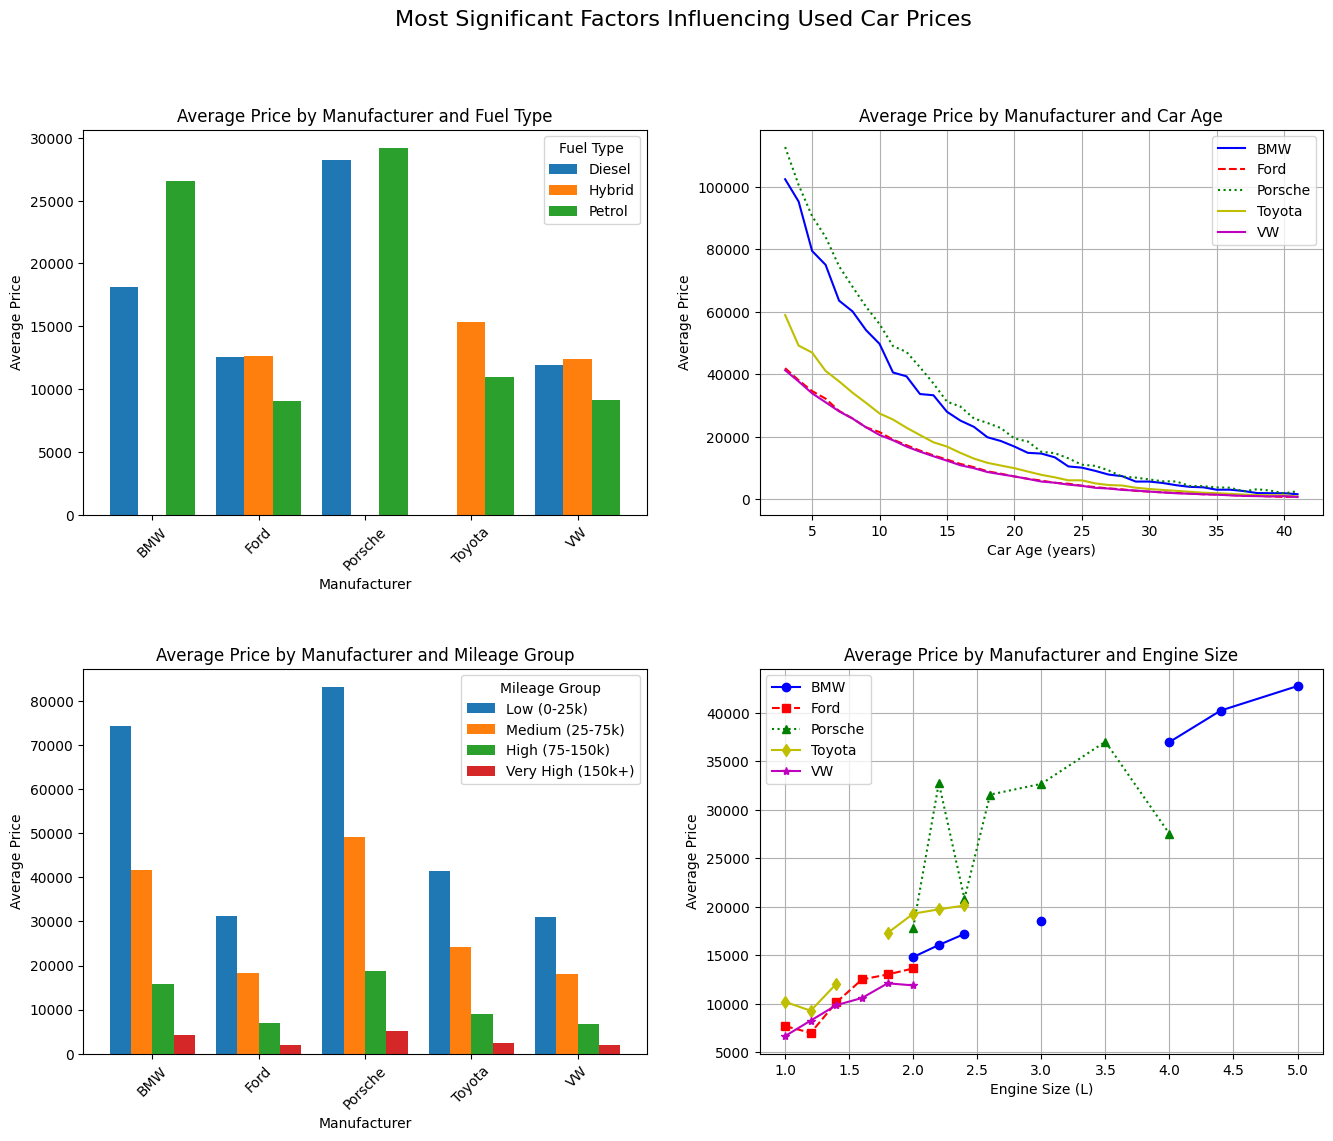

In [31]:
#Create graphs based on the pivot tables
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Graph 1: Manufacturer vs Fuel Type (from pivot1)
pivot1.plot(kind='bar', ax=ax1, width=0.8)
ax1.set_title('Average Price by Manufacturer and Fuel Type')
ax1.set_xlabel('Manufacturer')
ax1.set_ylabel('Average Price')
ax1.legend(title='Fuel Type')
ax1.tick_params(axis='x', rotation=45)

# Graph 2: line graph (from pivot2)
# Extract data for each manufacturer from pivot2
bmw_prices = pivot2.loc['BMW']
ford_prices = pivot2.loc['Ford']
porsche_prices = pivot2.loc['Porsche']
toyota_prices = pivot2.loc['Toyota']
vw_prices = pivot2.loc['VW']

#Create a graph from pivot2 data
ax2.plot(bmw_prices, 'b-', label='BMW')
ax2.plot(ford_prices, 'r--', label='Ford')
ax2.plot(porsche_prices, 'g:', label='Porsche')
ax2.plot(toyota_prices, 'y-', label='Toyota')
ax2.plot(vw_prices, 'm-', label='VW')

ax2.set_title('Average Price by Manufacturer and Car Age')
ax2.set_xlabel('Car Age (years)')
ax2.set_ylabel('Average Price')
ax2.legend()
ax2.grid(True)

#Create a third graph based on data from pivot table 3
pivot3.plot(kind='bar', ax=ax3, width=0.8)
ax3.set_title('Average Price by Manufacturer and Mileage Group')
ax3.set_xlabel('Manufacturer')
ax3.set_ylabel('Average Price')
ax3.legend(title='Mileage Group')
ax3.tick_params(axis='x', rotation=45)

#Create a fourth graph based on the data from pivot table 4
# Graph 4: Line graph for Engine Size vs Price by Manufacturer
bmw_engine = pivot4.loc['BMW']
ford_engine = pivot4.loc['Ford']
porsche_engine = pivot4.loc['Porsche']
toyota_engine = pivot4.loc['Toyota']
vw_engine = pivot4.loc['VW']

ax4.plot(bmw_engine.index, bmw_engine.values, 'b-o', label='BMW')
ax4.plot(ford_engine.index, ford_engine.values, 'r--s', label='Ford')
ax4.plot(porsche_engine.index, porsche_engine.values, 'g:^', label='Porsche')
ax4.plot(toyota_engine.index, toyota_engine.values, 'y-d', label='Toyota')
ax4.plot(vw_engine.index, vw_engine.values, 'm-*', label='VW')

ax4.set_title('Average Price by Manufacturer and Engine Size')
ax4.set_xlabel('Engine Size (L)')
ax4.set_ylabel('Average Price')
ax4.legend()
ax4.grid(True)

plt.suptitle('Most Significant Factors Influencing Used Car Prices', fontsize=16, y=0.98)

# Increase vertical spacing between the rows
plt.subplots_adjust(hspace=0.4)

plt.show()

#Analyzing the Results

 Our main question we want to answer is "What are the most significant factors that influence used car prices?" These graphs we created with the data reveal some interesting trends. To answer our main question, we need to look at all four graphs. Doing so, we can see that Car Age and Mileage are the two biggest factors in influencing used car prices.
 #
 The first graph shows price vs. fuel type. In this graph, there is no clear trend. For some manufacturers, petrol vehicles were cheaper. For other brands, they were more expensive than other fuels.
#
 The second graph depicts price versus car age. This graph shows a clear trend and it points toward car age being one of the most significant factors to influence price. The graph clearly shows that no matter the brand of car, as the car ages, the price decreases.
#
The third graph also depicts a significant trend. This graph compares price versus mileage. No matter the car brand, the price decreases as the mileage increases. The mileage is grouped to make it easier to read and the results are clear. Across all brands, the most expensive cars have less than 25 thousand miles accumulated.

#
The final graph compares price versus engine size. This graph is interesting because it does show that engine size influences price. However, it does not have as strong of an influence as depiected in graphs #2 and #3. The trend shows that in general, the higher engine sizes result in a higher price. The difference between the trends in graphs #2 and #3 is that the difference in price is less significant in graph #4.


##Sub-Question #1
My first sub-question is "How does car age and mileage affect vehicle prices and which has a stronger impact on depreciation?"

Graphs #2 and #3 depict vehicle price versus age and mileage respectively. Both graphs show a clear and consistent negative impact on vehicle prices. Meaning that as both mileage and age increase, the cost of the vehicle decreases. This trend is consistent among all the car brands. Because of the consistent and dramatic trend, we can definitely say that both car age and mileage have a strong impact on depreciation.
#
In order to determine which has a stronger impact on depreciation, we can use the Correlation Coefficient. This will show us the strength of the relationship between the variables.
In the box below is the code to determine the correlation coefficient. It shows that car age has the stronger impact on depreciation.



In [32]:
print("Car Data Correlations:")
print(f"Car Age vs Price: {df['Car_age'].corr(df['Price']):.3f}")
print(f"Mileage vs Price: {df['Mileage'].corr(df['Price']):.3f}")

Car Data Correlations:
Car Age vs Price: -0.714
Mileage vs Price: -0.633


##Sub-Question #2
Which car manufacturers hold their value best over time?

Looking at our graphs, we can see that Porsche and BMW hold their value the best over time. Even at higher age and more mileage, both brands are worth more than than the other car makers.


##Sub-Question #3
How much does fuel type influence the price of the car?
#
Looking at graph #1, we can see that fuel type does not seem to influence the price of a car very much. Across all brands, the type of fuel may influence the price slightly. However, it is not enough of an influence to be considered a "significant factor" in the cost of the vehicle. For example, with brands like Toyota and Ford, diesal and hybrid vehicles cost more than petrol, but only by a few thousand dollars.

##Summary
#
The main findings from this data set was that car age and car mileage have a dramatic impact on the price of a used car. The other variables, fuel type and engine size, also had a slight impact.
#
What I did not find in this data is how electric vehicles impact the price of used cars. More and more car manufacturers are producing electric cars and I would like to see how that fuel type would impact the price.
#
I found a few issues with the data. First, the data is from Europe. So I would need to compare these results with a data set from the United States to get a better understanding of the trends here. Also, I think more car brands would be helpful as it would give a better picture of how car values depreciate.